In [53]:
import numpy as np
import matplotlib.pyplot as plt
X_train = np.load("reshaped_14.npy")

In [59]:
hidden_nodes = 225
middle = 50
lr = 1e-3
samples = 60000
# input_size = 784
input_size = 196
X = X_train.reshape(samples,input_size)
X = X/255.0
Lambda = 1
s = 0.05
# defining functions

def sigm(x):
    return 1/(1+np.exp(-x))

def diff_sigm(x):
    return (sigm(x)-(sigm(x)**2))

def layer(x,W,b):
    return np.matmul(x,W)+b

def backprop_last(output,label,out_penult):
    del1 = 2*(output-label)*diff_sigm(out_penult)
    return del1

def backprop_layer(prev_delta,out_prev,prev_weights):
    sn = (diff_sigm(out_prev)*np.matmul(prev_delta,prev_weights.T))
    return sn

W1 = np.random.normal(0,1,(input_size,middle))
Bi1 = np.random.normal(0,1,(1,middle))
W2 = np.random.normal(0,1,(middle,hidden_nodes))
Bi2 = np.random.normal(0,1,(1,hidden_nodes))
W3 = np.random.normal(0,1,(hidden_nodes,middle))
Bi3 = np.random.normal(0,1,(1,middle))
W4 = np.random.normal(0,1,(middle,input_size))
Bi4 = np.random.normal(0,1,(1,input_size))


In [60]:
epochs = 50
for i in range(epochs):
    loss = 0
    w1 = w2 = w3 = w4 = 0
    b1 = b2 = b3 = b4 = 0
    #forward pass
    out1 = layer(X,W1,Bi1)
    m1 = sigm(out1)
    out2 = layer(m1,W2,Bi2)
    z  = sigm(out2)
    out3 = layer(z,W3,Bi3)
    m2 = sigm(out3)
    out4 = layer(m2,W4,Bi4)
    y = sigm(out4)
    #BACKPROPAGATION
    del1 = backprop_last(y,X,out4)
    b4 = np.sum(del1, axis = 0).reshape(np.shape(Bi4))
    w4 = np.matmul(m2.T,del1)
#     print(del1.shape, out3.shape, W4.shape)
    s3 = backprop_layer(del1,out3,W4)
    w3 = np.matmul(z.T,s3)
    b3 = np.sum(s3,axis=0).reshape(np.shape(Bi3))
    ################ sparsity conditioning
    zm = np.mean(z,axis = 0)
    ge = (Lambda)*(-s/zm + (1-s)/(1-zm))*diff_sigm(out2)
    ################
    s2 = ge+backprop_layer(s3,out2,W3)
    b2 = np.sum(s2,axis=0).reshape(np.shape(Bi2))
    w2 = np.matmul(m1.T,s2)
    
    s1 = backprop_layer(s2,out1,W2)
    w1 = np.matmul(X.T,s1)
    b1 = np.sum(s1,axis=0).reshape(np.shape(Bi1))
    
    loss = np.sum(np.linalg.norm(y-X)**2)
    print(i,loss)
    W1 -= lr*w1
    W2 -= lr*w2
    W3 -= lr*w3
    W4 -= lr*w4
    Bi1 -= lr*b1
    Bi2 -= lr*b2
    Bi3 -= lr*b3
    Bi4 -= lr*b4
    

(0, 4214517.628341729)


/home/legion/.local/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in exp
  


(1, 1790786.264734628)
(2, 1581415.6728111547)


/home/legion/.local/lib/python2.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in divide
/home/legion/.local/lib/python2.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in multiply


(3, 1382035.6015931258)
(4, nan)
(5, nan)
(6, nan)
(7, nan)
(8, nan)
(9, nan)
(10, nan)
(11, nan)
(12, nan)
(13, nan)
(14, nan)
(15, nan)
(16, nan)
(17, nan)
(18, nan)
(19, nan)
(20, nan)
(21, nan)
(22, nan)
(23, nan)
(24, nan)
(25, nan)
(26, nan)
(27, nan)
(28, nan)
(29, nan)
(30, nan)
(31, nan)
(32, nan)
(33, nan)
(34, nan)
(35, nan)
(36, nan)
(37, nan)
(38, nan)
(39, nan)
(40, nan)
(41, nan)
(42, nan)
(43, nan)
(44, nan)
(45, nan)
(46, nan)
(47, nan)
(48, nan)
(49, nan)


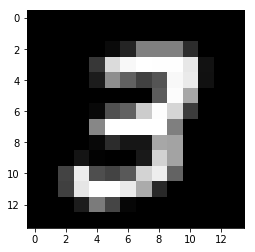

In [61]:
plt.imshow(X[7].reshape(14,14) , cmap='gray')

/home/legion/.local/lib/python2.7/site-packages/matplotlib/image.py:405: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/home/legion/.local/lib/python2.7/site-packages/matplotlib/image.py:406: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/home/legion/.local/lib/python2.7/site-packages/matplotlib/image.py:413: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/home/legion/.local/lib/python2.7/site-packages/matplotlib/image.py:418: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
/home/legion/.local/lib/python2.7/site-packages/matplotlib/colors.py:916: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/home/legion/.local/lib/python2.7/site-packages/numpy/ma/core.py:715: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


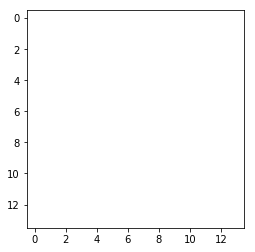

In [62]:
y = y*255.0
plt.imshow(y[7].reshape(14,14) , cmap='gray' )

In [63]:
count = 0
for i in range(len(z[1])):
    if(z[1][i] > 0.01):
        count += 1
print(count,len(z[1]))
print(np.mean(z[1]))

(0, 225)
nan
